<a href="https://colab.research.google.com/github/Tripyromaniac/CS105.M21.KHCL/blob/main/19522390_BT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install folium

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1957, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1957 (delta 7), reused 1 (delta 1), pack-reused 1911
Receiving objects: 100% (1957/1957), 169.10 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (1056/1056), done.
Checking out files: 100% (542/542), done.


In [ ]:
df = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [ ]:
print(df)

      Dist_Name Dist_ID     Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  \
0    District 1     760  District  180225.0  187435.0  187419.0  190943.0   
1    District 3     770  District  190553.0  188945.0  190631.0  191580.0   
2    District 4     773  District  180980.0  183261.0  184711.0  185649.0   
3    District 6     775  District  249329.0  253474.0  254212.0  257865.0   
4    District 7     778  District  244276.0  274828.0  268483.0  266633.0   
5   District 10     771  District  230345.0  232450.0  236336.0  237086.0   
6   District 11     772  District  226854.0  232536.0  236443.0  233499.0   
7     Phu Nhuan     768  District  174535.0  175175.0  177242.0  179917.0   
8      Tan Binh     766  District  421724.0  430436.0  434298.0  440351.0   
9    Binh Thanh     765  District  457362.0  470054.0  484135.0  484423.0   
10       Go Vap     764  District  522690.0  548145.0  566216.0  588606.0   
11      Tan Phu     767  District  398102.0  407924.0  423074.0  439099.0   

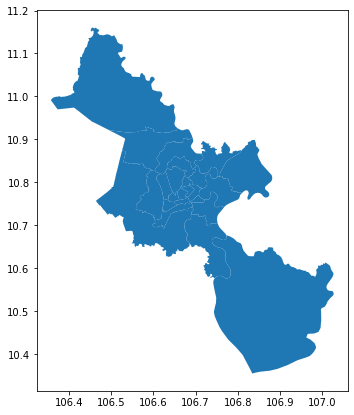

In [ ]:
df.plot(figsize=(7, 7))
plt.show()

In [ ]:
df.crs
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

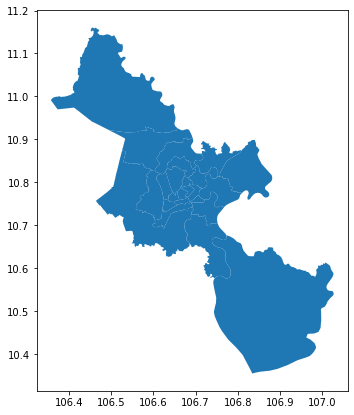

In [ ]:
df.plot(figsize=(7, 7))
plt.show()


In [ ]:
m = folium.Map(location=[10.8, 106.7], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
# Project to NAD83 projected crs
df = df.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
df['centroid'] = df.centroid

# Project to WGS84 geographic crs

# geometry (active) column
df = df.to_crs(epsg=4326)

# Centroid column
df['centroid'] = df['centroid'].to_crs(epsg=4326)
df.head()

In [ ]:
for _, r in df.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m